# <span style="color:blue">**NBA statistics** </span>
Dataset Link: https://www.kaggle.com/datasets/tombutton/basketball

The data is between 1990 and 2016. Each row describes the performance of a basketball player during his first year ("rookie"). 5yse has added a destination characteristic. This is 1 if the player still played in the NBA 5 years later, or 0 otherwise.

**Research Question**

What characteristics can be used to predict if a rookie player will have a successful career?

# <span style="color:blue"> Importing Libraries</span>

In [32]:
library(ggplot2)
library(ggpubr)
library(dplyr)
library(psych)
library(corrplot)
library(RColorBrewer)
library(funModeling)
library(randomForest)
library(purrr)
library(tibble)
library(doMC)
library(caret)
library(recipes)
library(parsnip)
library(dials)
library(workflows)
library(tune)
library(rsample)
library(yardstick)
library(kknn)

# <span style="color:blue">Loadings Datasets </span>

### Cargar datos y tipos de variables

In [33]:
data <- read.csv("/kaggle/input/basketball/nba_data.csv", sep = ",")
head(data)

,Name,GP,MIN,PTS,FGS,FGA,X3PM,X3PA,FTM,FTA,OREB,DREB,AST,STL,BLK,TOV,X5Yrs
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,Brandon Ingram,36,27.4,7.4,2.6,7.6,0.5,2.1,1.6,2.3,0.7,3.4,1.9,0.4,0.4,1.3,0
2,Andrew Harrison,35,26.9,7.2,2.0,6.7,0.7,2.8,2.6,3.4,0.5,2.0,3.7,1.1,0.5,1.6,0
3,JaKarr Sampson,74,15.3,5.2,2.0,4.7,0.4,1.7,0.9,1.3,0.5,1.7,1.0,0.5,0.3,1.0,0
4,Malik Sealy,58,11.6,5.7,2.3,5.5,0.1,0.5,0.9,1.3,1.0,0.9,0.8,0.6,0.1,1.0,1
5,Matt Geiger,48,11.5,4.5,1.6,3.0,0.0,0.1,1.3,1.9,1.0,1.5,0.3,0.3,0.4,0.8,1
6,Tony Bennett,75,11.4,3.7,1.5,3.5,0.3,1.1,0.4,0.5,0.2,0.7,1.8,0.4,0.0,0.7,0


# <span style="color:blue">Pre-processing of data </span>

In [34]:
# Data data types
str(data)

# Verifying data
summary(data)

# Changing the type of variable to the Target variable
data$X5Yrs <- if_else(data$X5Yrs == 1, "Si", "No")
data$X5Yrs <- as.factor(data$X5Yrs)

head(data)

'data.frame':	1308 obs. of  17 variables:
 $ Name : chr  "Brandon Ingram" "Andrew Harrison" "JaKarr Sampson" "Malik Sealy" ...
 $ GP   : int  36 35 74 58 48 75 62 48 65 42 ...
 $ MIN  : num  27.4 26.9 15.3 11.6 11.5 11.4 10.9 10.3 9.9 8.5 ...
 $ PTS  : num  7.4 7.2 5.2 5.7 4.5 3.7 6.6 5.7 2.4 3.7 ...
 $ FGS  : num  2.6 2 2 2.3 1.6 1.5 2.5 2.3 1 1.4 ...
 $ FGA  : num  7.6 6.7 4.7 5.5 3 3.5 5.8 5.4 2.4 3.5 ...
 $ X3PM : num  0.5 0.7 0.4 0.1 0 0.3 0 0.4 0.1 0.1 ...
 $ X3PA : num  2.1 2.8 1.7 0.5 0.1 1.1 0.1 1.5 0.5 0.3 ...
 $ FTM  : num  1.6 2.6 0.9 0.9 1.3 0.4 1.5 0.7 0.4 1 ...
 $ FTA  : num  2.3 3.4 1.3 1.3 1.9 0.5 1.8 0.8 0.5 1.4 ...
 $ OREB : num  0.7 0.5 0.5 1 1 0.2 0.5 0.8 0.2 0.4 ...
 $ DREB : num  3.4 2 1.7 0.9 1.5 0.7 1.4 0.9 0.6 0.7 ...
 $ AST  : num  1.9 3.7 1 0.8 0.3 1.8 0.6 0.2 2.3 0.3 ...
 $ STL  : num  0.4 1.1 0.5 0.6 0.3 0.4 0.2 0.2 0.3 0.2 ...
 $ BLK  : num  0.4 0.5 0.3 0.1 0.4 0 0.1 0.1 0 0 ...
 $ TOV  : num  1.3 1.6 1 1 0.8 0.7 0.7 0.7 1.1 0.7 ...
 $ X5Yrs: int  0 0 0 1

     Name                 GP             MIN             PTS        
 Length:1308        Min.   :11.00   Min.   : 3.10   Min.   : 0.700  
 Class :character   1st Qu.:47.00   1st Qu.:10.90   1st Qu.: 3.700  
 Mode  :character   Median :63.00   Median :16.10   Median : 5.550  
                    Mean   :60.34   Mean   :17.61   Mean   : 6.785  
                    3rd Qu.:77.00   3rd Qu.:22.82   3rd Qu.: 8.800  
                    Max.   :82.00   Max.   :40.90   Max.   :28.200  
      FGS              FGA              X3PM             X3PA       
 Min.   : 0.300   Min.   : 0.800   Min.   :0.0000   Min.   :0.0000  
 1st Qu.: 1.400   1st Qu.: 3.300   1st Qu.:0.0000   1st Qu.:0.0000  
 Median : 2.100   Median : 4.800   Median :0.1000   Median :0.3000  
 Mean   : 2.623   Mean   : 5.872   Mean   :0.2491   Mean   :0.7814  
 3rd Qu.: 3.400   3rd Qu.: 7.500   3rd Qu.:0.4000   3rd Qu.:1.2000  
 Max.   :10.200   Max.   :19.800   Max.   :2.3000   Max.   :6.5000  
      FTM             FTA         

,Name,GP,MIN,PTS,FGS,FGA,X3PM,X3PA,FTM,FTA,OREB,DREB,AST,STL,BLK,TOV,X5Yrs
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,Brandon Ingram,36,27.4,7.4,2.6,7.6,0.5,2.1,1.6,2.3,0.7,3.4,1.9,0.4,0.4,1.3,No
2,Andrew Harrison,35,26.9,7.2,2.0,6.7,0.7,2.8,2.6,3.4,0.5,2.0,3.7,1.1,0.5,1.6,No
3,JaKarr Sampson,74,15.3,5.2,2.0,4.7,0.4,1.7,0.9,1.3,0.5,1.7,1.0,0.5,0.3,1.0,No
4,Malik Sealy,58,11.6,5.7,2.3,5.5,0.1,0.5,0.9,1.3,1.0,0.9,0.8,0.6,0.1,1.0,Si
5,Matt Geiger,48,11.5,4.5,1.6,3.0,0.0,0.1,1.3,1.9,1.0,1.5,0.3,0.3,0.4,0.8,Si
6,Tony Bennett,75,11.4,3.7,1.5,3.5,0.3,1.1,0.4,0.5,0.2,0.7,1.8,0.4,0.0,0.7,No


### Viewing NA by column

In [35]:
# By means of column
apply(X = is.na(data), MARGIN = 2, FUN = sum)  

Name    GP   MIN   PTS   FGS   FGA  X3PM  X3PA   FTM   FTA  OREB  DREB   AST 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
  STL   BLK   TOV X5Yrs 
    0     0     0     0

> We observe that we don't find Na values

### Eliminating duplicates

In [36]:
# Finding the duplicates
data %>% group_by(Name) %>% filter(duplicated(Name))
# Eliminating duplicates
data <- data %>% group_by(Name) %>% filter(!duplicated(Name))
# Again disagreated
data <- data %>% ungroup()

Name,GP,MIN,PTS,FGS,FGA,X3PM,X3PA,FTM,FTA,OREB,DREB,AST,STL,BLK,TOV,X5Yrs
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Dee Brown,49,9.2,1.9,0.7,2.0,0.1,0.6,0.5,0.8,0.2,0.7,1.7,0.5,0.1,0.6,No
Michael Smith,82,21.2,6.9,2.7,5.0,0.0,0.0,1.5,3.2,2.1,3.8,0.8,0.7,0.6,1.3,No
Charles Smith,71,30.4,16.3,6.1,12.4,0.0,0.0,4.0,5.5,2.4,4.1,1.5,1.0,1.3,2.1,Si
Charles Smith,34,8.6,3.5,1.4,3.7,0.4,1.4,0.2,0.3,0.4,0.4,0.6,0.3,0.2,0.8,Si
Michael Anderson,65,18.5,7.4,2.9,5.8,0.0,0.1,1.5,2.7,1.8,2.7,1.0,1.0,0.3,1.2,No
Mark Bryant,36,7.0,1.6,0.7,1.6,0.0,0.0,0.3,0.4,0.7,1.2,0.2,0.1,0.1,0.3,Si
Mark Davis,57,10.0,3.3,1.0,2.6,0.1,0.2,1.3,2.0,1.0,1.2,0.8,0.7,0.4,1.2,Si
Bob Martin,53,10.1,2.1,0.8,1.7,0.0,0.0,0.6,1.0,0.7,1.5,0.3,0.1,0.6,0.6,No
Charles Jones,29,16.4,3.7,1.3,4.2,0.7,2.1,0.4,0.8,0.3,1.1,1.4,0.6,0.2,1.0,Si


### Variable distribution response


 No  Si 
487 807 


  No   Si 
0.38 0.62 

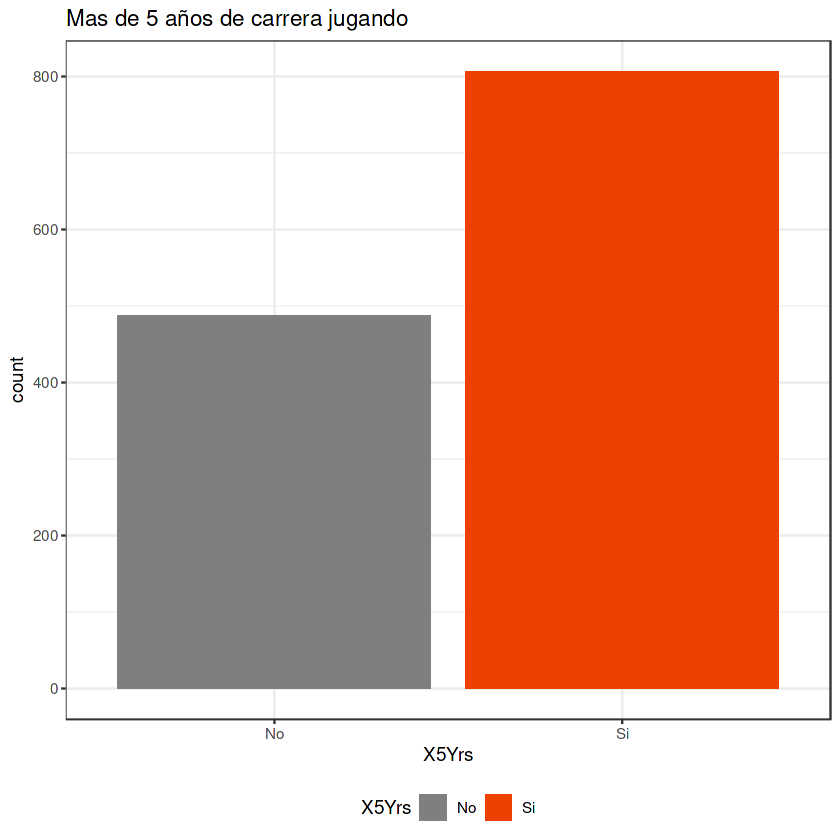

In [37]:
ggplot(data = data, aes(x = X5Yrs, y = after_stat(count), fill = X5Yrs)) +
  geom_bar() +
  scale_fill_manual(values = c("gray50", "orangered2")) +
  labs(title = "Mas de 5 años de carrera jugando") +
  theme_bw() +
  theme(legend.position = "bottom")

# Frequency table
table(data$X5Yrs)

# Percentage
prop.table(table(data$X5Yrs)) %>% round(digits = 2)

### Correlation map

GP,MIN,PTS,FGS,FGA,X3PM,X3PA,FTM,FTA,OREB,DREB,AST,STL,BLK,TOV,X5Yrs
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
36,27.4,7.4,2.6,7.6,0.5,2.1,1.6,2.3,0.7,3.4,1.9,0.4,0.4,1.3,0
35,26.9,7.2,2.0,6.7,0.7,2.8,2.6,3.4,0.5,2.0,3.7,1.1,0.5,1.6,0
74,15.3,5.2,2.0,4.7,0.4,1.7,0.9,1.3,0.5,1.7,1.0,0.5,0.3,1.0,0
58,11.6,5.7,2.3,5.5,0.1,0.5,0.9,1.3,1.0,0.9,0.8,0.6,0.1,1.0,1
48,11.5,4.5,1.6,3.0,0.0,0.1,1.3,1.9,1.0,1.5,0.3,0.3,0.4,0.8,1
75,11.4,3.7,1.5,3.5,0.3,1.1,0.4,0.5,0.2,0.7,1.8,0.4,0.0,0.7,0


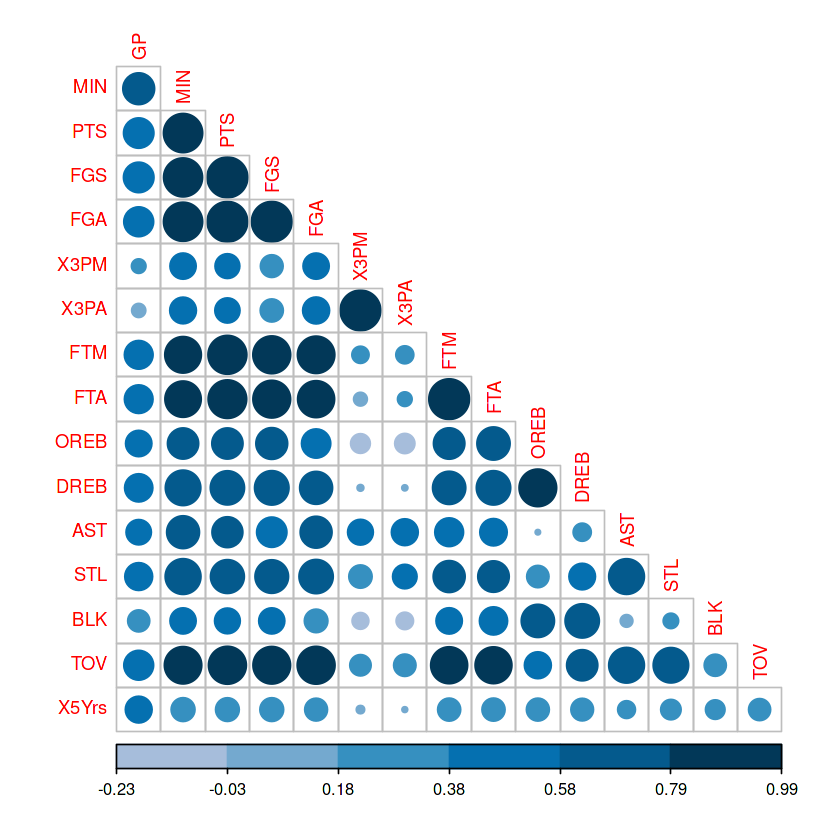

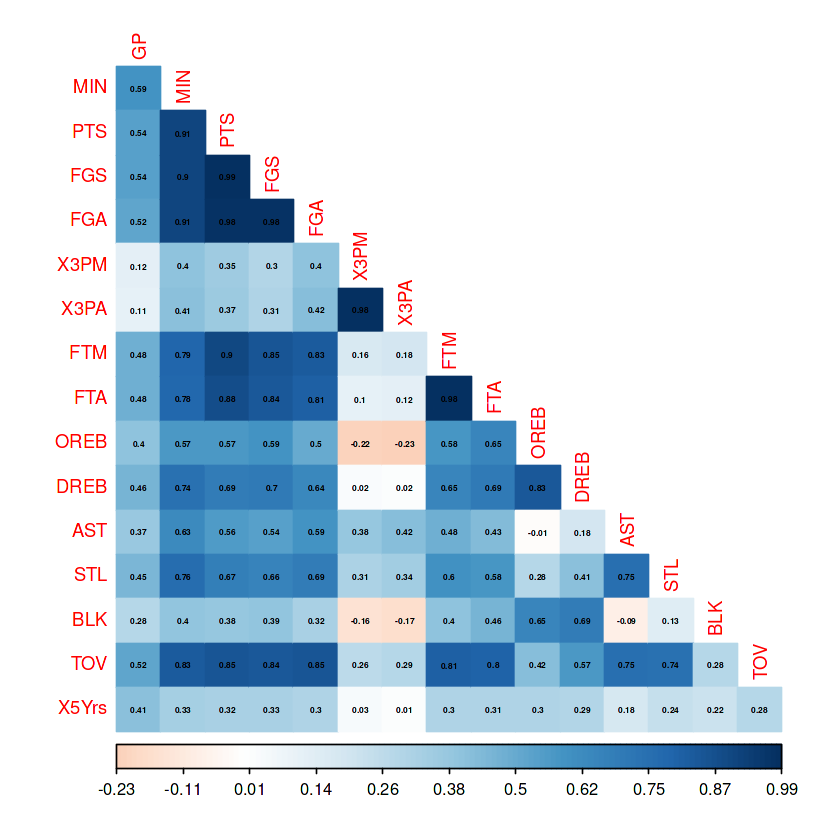

In [38]:
# Creating a data with only numerical columns# 
data_numeric <- data %>% ungroup() %>% select(-Name)
data_numeric$X5Yrs <- if_else(data_numeric$X5Yrs == "Si", 1, 0)
data_numeric$X5Yrs <- as.integer(data_numeric$X5Yrs)
head(data_numeric)

# Map of correlations by shape and color
corrplot(cor(data_numeric), 
         method="circle",
         col=brewer.pal(n=9, name="PuBu"),
         type="lower", 
         tl.col="red",
         tl.cex = 0.9, 
         tl.srt=90, 
         diag=FALSE, 
         is.corr = F)

# Map of correlations by value and color
corrplot(cor(data_numeric), 
         method="color",
         type="lower", 
         number.cex=0.4,
         addCoef.col = "black", 
         tl.col="red", 
         tl.srt=90, 
         tl.cex = 0.9,
         diag=FALSE, 
         is.corr = F)

> There is high correlation between some variables

### Outliers analysis

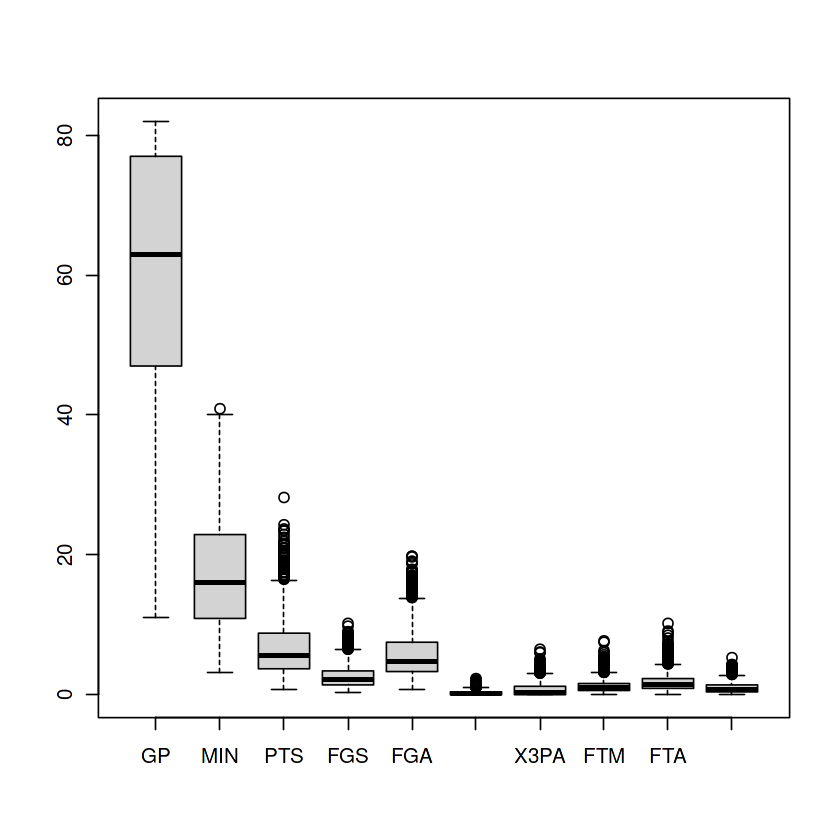

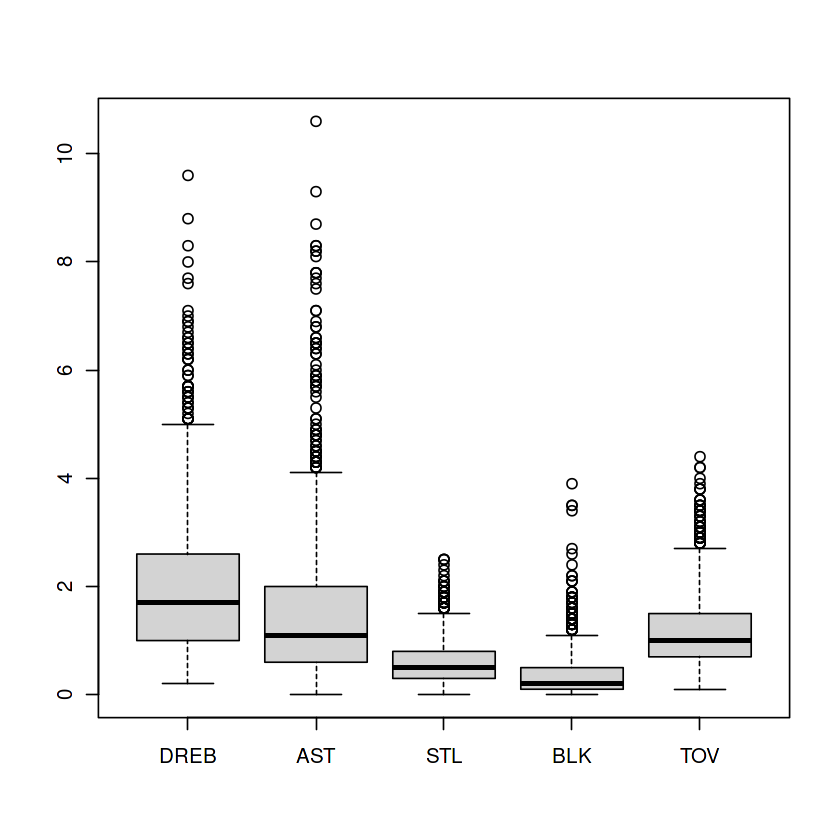

In [39]:
# Bloxplot de los 10 primeros atributos
boxplot(data_numeric %>% select(c(1:10)))
# Bloxplot de los 9 últimos atributos
boxplot(data_numeric %>% select(c(11:15)))


> It is observed that the GP attribute does not present atypical values

### Standardizing numerical variables

In [40]:
data_scale <- mutate_if(data, is.numeric, scale)

## Selection method

### Random Forest

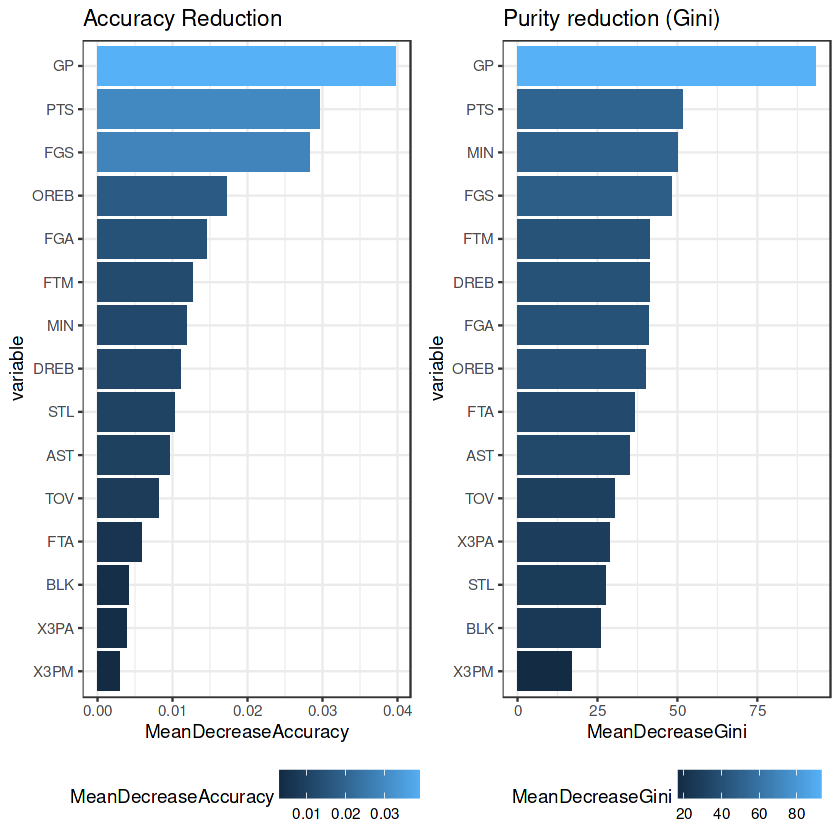

In [41]:
datos_rf <- data_scale %>% select(-Name) %>%  
            na.omit()
datos_rf <- map_if(.x = datos_rf, .p = is.character, .f = as.factor) %>%
            as.data.frame()
modelo_randforest <- randomForest(formula = X5Yrs ~ . ,
                                   data = na.omit(datos_rf),
                                  mtry = 5,
                                  importance = TRUE, 
                                  ntree = 1000) 
importancia <- as.data.frame(modelo_randforest$importance)
importancia <- rownames_to_column(importancia,var = "variable")
p1 <- ggplot(data = importancia, aes(x = reorder(variable, MeanDecreaseAccuracy),
                               y = MeanDecreaseAccuracy,
                               fill = MeanDecreaseAccuracy)) +
      labs(x = "variable", title = "Accuracy Reduction") +
      geom_col() +
      coord_flip() +
      theme_bw() +
      theme(legend.position = "bottom")
p2 <- ggplot(data = importancia, aes(x = reorder(variable, MeanDecreaseGini),
                               y = MeanDecreaseGini,
                               fill = MeanDecreaseGini)) +
      labs(x = "variable", title = "Purity reduction (Gini)") +
      geom_col() +
      coord_flip() +
      theme_bw() +
      theme(legend.position = "bottom")
ggarrange(p1, p2)

> Importance of variables in prediction

### Outliers analysis of the Escalada Data

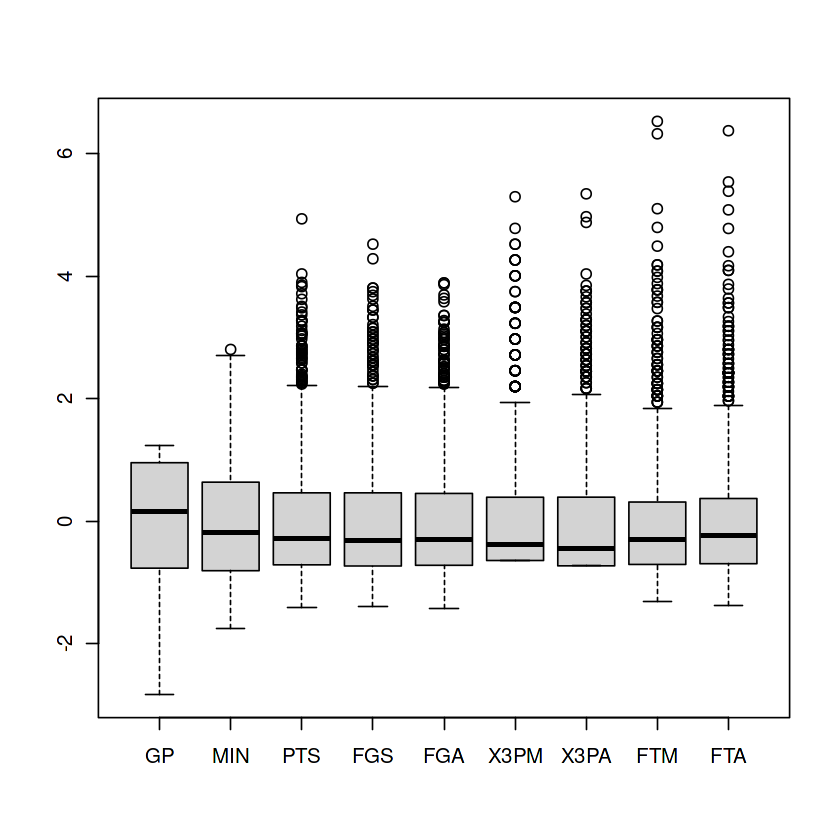

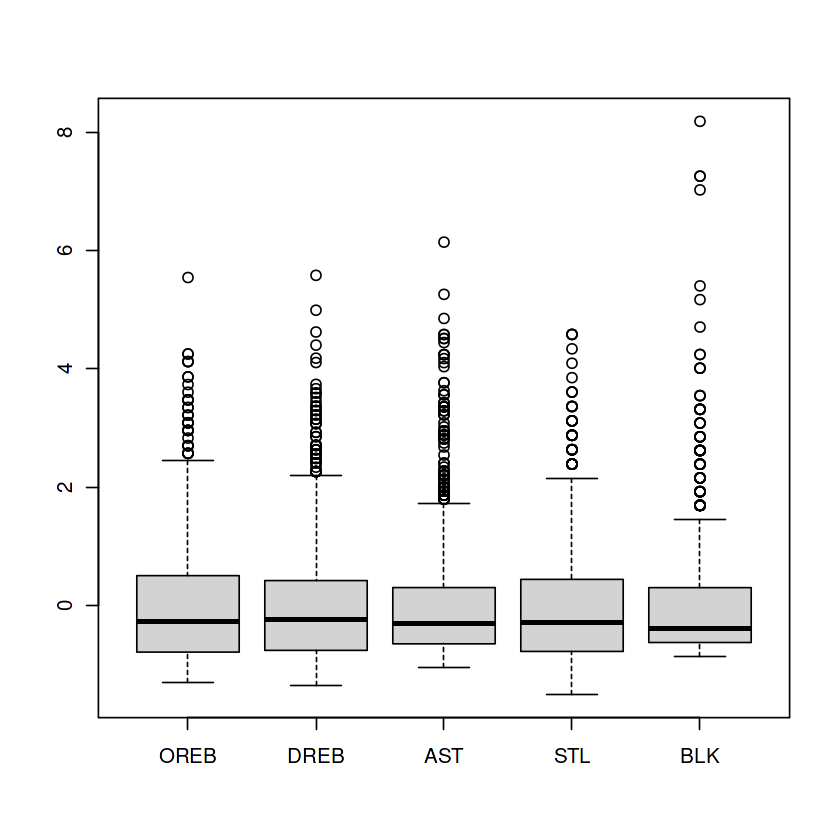

In [42]:
# Bloxplot of the first 10 attributes
boxplot(data_scale %>% select(c(2:10)))
# Boxplot of the last 9 attributes
boxplot(data_scale %>% select(c(11:15)))

> It is observed that the GP attribute does not present atypical values

### TRAIN-TEST

In [43]:
set.seed(1234) # Seed for random
bco_split <- data %>%
initial_split(prop = 0.8,
strata = X5Yrs)
train <- training(bco_split)
dim(train)

[1] 1034   17

In [44]:
test <- testing(bco_split)
dim(test)

[1] 260  17

### Definition for tuning

In [45]:
set.seed(1234)
cv_banco <- vfold_cv(train, v =5, repeats = 1, strata = X5Yrs)

### Define the metrics that we want to be executed in each resume

In [46]:
metricas <- metric_set(roc_auc, accuracy, sens, spec, bal_accuracy)

## k-Nearest Neighbors
### Recipe - Standardized data

In [47]:
rct_bcoPor <- train %>% recipe(X5Yrs ~ . ) %>%
step_normalize( all_numeric(), -all_outcomes()) %>% 
step_other(all_nominal(), -all_outcomes() ) %>% 
step_dummy(all_nominal(), -all_outcomes() ) %>% 
step_corr(all_numeric(), -all_outcomes(), threshold = 0.9) %>%
step_nzv(all_predictors())

### Model

In [48]:
knn_sp <-
    nearest_neighbor(neighbors= tune(), weight_func= tune(), dist_power= tune()) %>%
    set_engine("kknn") %>%
    set_mode("classification")

knn_sp %>%
    translate()

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = tune()
  dist_power = tune()

Computational engine: kknn 

Model fit template:
kknn::train.kknn(formula = missing_arg(), data = missing_arg(), 
    ks = min_rows(tune(), data, 5), kernel = tune(), distance = tune())

### Grid

In [49]:
set.seed(123)

knn_grid <- knn_sp %>%
  parameters() %>%
  update(weight_func= weight_func(c("biweight", "rectangular")) ) %>%
  grid_latin_hypercube(size = 6)

In [50]:
knn_grid

neighbors,weight_func,dist_power
<int>,<chr>,<dbl>
11,rectangular,1.8999119
6,biweight,1.2451844
8,rectangular,0.3734916
1,rectangular,1.0022246
15,biweight,1.6039223
5,biweight,0.6134885


### Workflow Definition

In [51]:
knn_wflow <-
    workflow() %>%
    add_recipe(rct_bcoPor %>% step_sample(size = 5000)) %>%
    add_model(knn_sp)

knn_wflow

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
6 Recipe Steps

• step_normalize()
• step_other()
• step_dummy()
• step_corr()
• step_nzv()
• step_sample()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = tune()
  dist_power = tune()

Computational engine: kknn 


### Workflow Integration, Restore, parameters to try and metrics.

In [52]:
set.seed(123)

knn_tuned <- tune_grid(
    knn_wflow,
    resamples= cv_banco,
    grid = knn_grid,
    metrics = metricas,
    control= control_grid(allow_par = T)
)

### Better hyperparameters

In [53]:
show_best(knn_tuned, metric = 'accuracy', n = 4)

neighbors,weight_func,dist_power,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
11,rectangular,1.8999119,accuracy,binary,0.6895924,5,0.011246853,Preprocessor1_Model6
15,biweight,1.6039223,accuracy,binary,0.6673374,5,0.008034969,Preprocessor1_Model3
6,biweight,1.2451844,accuracy,binary,0.6411988,5,0.007063683,Preprocessor1_Model2
8,rectangular,0.3734916,accuracy,binary,0.6354345,5,0.011006679,Preprocessor1_Model4


In [54]:
show_best(knn_tuned, metric = 'sens', n = 4)

neighbors,weight_func,dist_power,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
11,rectangular,1.899912,sens,binary,0.5246087,5,0.03259771,Preprocessor1_Model6
1,rectangular,1.002225,sens,binary,0.5012654,5,0.01041852,Preprocessor1_Model5
6,biweight,1.245184,sens,binary,0.5012321,5,0.02150307,Preprocessor1_Model2
15,biweight,1.603922,sens,binary,0.4963037,5,0.02843204,Preprocessor1_Model3


In [55]:
show_best(knn_tuned, metric = 'bal_accuracy', n = 4)

neighbors,weight_func,dist_power,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
11,rectangular,1.899912,bal_accuracy,binary,0.6568780,5,0.014259203,Preprocessor1_Model6
15,biweight,1.603922,bal_accuracy,binary,0.6334232,5,0.011719468,Preprocessor1_Model3
6,biweight,1.245184,bal_accuracy,binary,0.6134067,5,0.008868255,Preprocessor1_Model2
1,rectangular,1.002225,bal_accuracy,binary,0.6064467,5,0.008189519,Preprocessor1_Model5


### The workflow closes with the values taken above.

In [56]:
knn_pars_fin <- select_best(knn_tuned, metric = 'accuracy')

knn_wflow_fin <-
    knn_wflow %>%
    finalize_workflow(knn_pars_fin)

knn_fitted <- fit(knn_wflow_fin, train)
knn_fitted

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
6 Recipe Steps

• step_normalize()
• step_other()
• step_dummy()
• step_corr()
• step_nzv()
• step_sample()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(11L,     data, 5), distance = ~1.89991187766039, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3220503
Best kernel: rectangular
Best k: 11

# <span style="color:blue">Training </span>

In [57]:
train %>%
    predict(knn_fitted, new_data = . ) %>%
    mutate(Real= train$X5Yrs) %>%
    conf_mat(truth = Real, estimate = .pred_class ) %>%
    summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7388781
kap,binary,0.4296886
sens,binary,0.5912596
spec,binary,0.8279070
ppv,binary,0.6744868
npv,binary,0.7705628
mcc,binary,0.4319143
j_index,binary,0.4191666
bal_accuracy,binary,0.7095833


### Confusion matrix

In [58]:
train %>%
    predict(knn_fitted, new_data = . ) %>%
    mutate(Real= train$X5Yrs) %>%
    conf_mat(truth = Real, estimate = .pred_class )

          Truth
Prediction  No  Si
        No 230 111
        Si 159 534

# <span style="color:blue">Testing </span>

In [59]:
test %>%
  predict(knn_fitted, new_data = . ) %>%
  mutate(Real= test$X5Yrs) %>%
  conf_mat(truth = Real, estimate = .pred_class ) %>%
  summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6653846
kap,binary,0.2592350
sens,binary,0.4591837
spec,binary,0.7901235
ppv,binary,0.5696203
npv,binary,0.7071823
mcc,binary,0.2626954
j_index,binary,0.2493071
bal_accuracy,binary,0.6246536


#### Confusion matrix

In [60]:
test %>%
  predict(knn_fitted, new_data = . ) %>%
  mutate(Real= test$X5Yrs) %>%
  conf_mat(truth = Real, estimate = .pred_class ) 

          Truth
Prediction  No  Si
        No  45  34
        Si  53 128